In [636]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

In [637]:
# Good, but 2 CLASSES ONLY
# alpha increases spread
# beta increases jitter
def generate_data(n, alpha=0.1, beta=1):
    data = np.empty((n, 2))
    data[0, :] = 1
    
    # 
    a = np.random.uniform(low=(-1-alpha), high=(-1+alpha), size=n)
    
    # "Flip" previous point and add some noise
    for k in range(1, n):
        data[k, ] = a[k]*data[k-1, :] + beta*np.random.normal(0, 1, size=2)
    
    # Labels are two classes (0, 1), strictly alternating, because of "flipping" above
    labs = np.array([0, 1]*(n//2 + 1))[:n]
    
    return (data, labs)

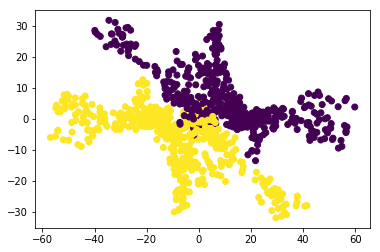

In [655]:
demo_data, demo_labs = generate_data(1000)

plt.scatter(demo_data[:, 0], demo_data[:, 1], c=demo_labs)

In [656]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [657]:
sigmoid(1)

0.7310585786300049

In [658]:
def predict(features, weights):
    Z = np.dot(features, weights)
    return sigmoid(Z)

In [668]:
weights = np.array([0.5, 0.5])

In [669]:
predict(demo_data, weights).shape

(1000,)

In [670]:
def cost(features, labels, weights):
    
    m = features.shape[0]
    preds = predict(features, weights)
    
    # Log-loss cost function
    cost = -(labels*np.log(preds) + (1-labels)*np.log(1-preds)).sum()
    
    # Average cost per observation
    return cost/m
    

In [671]:
cost(demo_data, demo_labs, weights)

8.642965276979929